# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [100]:
# import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [101]:
file_path = 'Temp_States.csv'

In [102]:
# your answer here
temp = pd.read_csv(file_path)

#### Print `temp`

In [103]:
temp


,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [104]:
# your answer here
temp.index.values

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [105]:
temp.index

RangeIndex(start=0, stop=7, step=1)

In [106]:
temp.values

array([['NYC', 'New York', 19.444444444444443],
       ['Albany', 'New York', 9.444444444444443],
       ['Buffalo', 'New York', 3.333333333333333],
       ['Hartford', 'Connecticut', 17.22222222222222],
       ['Bridgeport', 'Connecticut', 14.444444444444445],
       ['Treton', 'New Jersey', 22.222222222222218],
       ['Newark', 'New Jersey', 20.0]], dtype=object)

In [107]:
temp.shape

(7, 3)

In [108]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [109]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


In [110]:
temp.columns

Index(['City', 'State', 'Temperature'], dtype='object')

In [111]:
temp.axes

[RangeIndex(start=0, stop=7, step=1),
 Index(['City', 'State', 'Temperature'], dtype='object')]

In [112]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
City           7 non-null object
State          7 non-null object
Temperature    7 non-null float64
dtypes: float64(1), object(2)
memory usage: 248.0+ bytes


In [113]:
temp.get_dtype_counts()

float64    1
object     2
dtype: int64

#### Select the rows where state is New York

In [114]:
# your answer here
mask = temp["State"] == "New York"


In [115]:
mask

0     True
1     True
2     True
3    False
4    False
5    False
6    False
Name: State, dtype: bool

In [116]:
temp[mask]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


In [117]:
ny_temp = temp[mask]

In [118]:
ny_temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


In [119]:
#só retorna as cidades do estado de NY
ny_temp[['City', 'State']]

,City,State
0,NYC,New York
1,Albany,New York
2,Buffalo,New York


In [120]:
temp[temp.State == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


In [121]:
temp.query('State == "New York"')

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [122]:
# your answer here
temp[mask].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [123]:
# your answer here
#vamos filtrar os valores da coluna Temperatura que estao acima dos 15 graus, usando a maskara booleana.
temperature_mask = temp.Temperature > 15

In [124]:
# a mascara booleana irá retornar True se a temperatura for de acordo com a funçao.
# e False se ela não for
temperature_mask

0     True
1    False
2    False
3     True
4    False
5     True
6     True
Name: Temperature, dtype: bool

In [125]:
temp_15_celsius = temp[temperature_mask]
temp_15_celsius

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [126]:
# your answer here
temp[temp.Temperature > 15]['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [127]:
# your answer here
mask3 = temp['Temperature'] > 15
mask4 = temp['Temperature'] < 20

temp[mask3 & mask4]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


In [128]:
new_temp_list = temp[mask3 & mask4]

In [129]:
#ou
tempbet15and20 = (temp.Temperature > 15) & (temp.Temperature < 20)
tempbet15and20

0     True
1    False
2    False
3     True
4    False
5    False
6    False
Name: Temperature, dtype: bool

In [130]:
temp[tempbet15and20]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [131]:
# your answer here 
print(temp.groupby("State").mean())
print(temp.groupby("State").std())

             Temperature
State                   
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
             Temperature
State                   
Connecticut     1.964186
New Jersey      1.571348
New York        8.133404


In [132]:
temp.groupby("State").describe()

Temperature                                                        \
                  count       mean       std        min        25%        50%   
State                                                                           
Connecticut         2.0  15.833333  1.964186  14.444444  15.138889  15.833333   
New Jersey          2.0  21.111111  1.571348  20.000000  20.555556  21.111111   
New York            3.0  10.740741  8.133404   3.333333   6.388889   9.444444   

                                   
                   75%        max  
State                              
Connecticut  16.527778  17.222222  
New Jersey   21.666667  22.222222  
New York     14.444444  19.444444

In [133]:
temp.groupby("City").describe()

Temperature                                                  \
                 count       mean std        min        25%        50%   
City                                                                     
Albany             1.0   9.444444 NaN   9.444444   9.444444   9.444444   
Bridgeport         1.0  14.444444 NaN  14.444444  14.444444  14.444444   
Buffalo            1.0   3.333333 NaN   3.333333   3.333333   3.333333   
Hartford           1.0  17.222222 NaN  17.222222  17.222222  17.222222   
NYC                1.0  19.444444 NaN  19.444444  19.444444  19.444444   
Newark             1.0  20.000000 NaN  20.000000  20.000000  20.000000   
Treton             1.0  22.222222 NaN  22.222222  22.222222  22.222222   

                                  
                  75%        max  
City                              
Albany       9.444444   9.444444  
Bridgeport  14.444444  14.444444  
Buffalo      3.333333   3.333333  
Hartford    17.222222  17.222222  
NYC         19.444444  19.444444  
Newark      20.000000  20.000000  
Treton      22.222222  22.222222

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [134]:
# your answer here
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [135]:
# your answer here
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [136]:
employee.index

RangeIndex(start=0, stop=9, step=1)

In [137]:
employee.values

array([['Jose', 'IT', 'Bachelor', 'M', 'analyst', 1, 35],
       ['Maria', 'IT', 'Master', 'F', 'analyst', 2, 30],
       ['David', 'HR', 'Master', 'M', 'analyst', 2, 30],
       ['Sonia', 'HR', 'Bachelor', 'F', 'analyst', 4, 35],
       ['Samuel', 'Sales', 'Master', 'M', 'associate', 3, 55],
       ['Eva', 'Sales', 'Bachelor', 'F', 'associate', 2, 55],
       ['Carlos', 'IT', 'Master', 'M', 'VP', 8, 70],
       ['Pedro', 'IT', 'Phd', 'M', 'associate', 7, 60],
       ['Ana', 'HR', 'Master', 'F', 'VP', 8, 70]], dtype=object)

In [138]:
employee.shape

(9, 7)

In [139]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [140]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
Name          9 non-null object
Department    9 non-null object
Education     9 non-null object
Gender        9 non-null object
Title         9 non-null object
Years         9 non-null int64
Salary        9 non-null int64
dtypes: int64(2), object(5)
memory usage: 584.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [141]:
# your answer here

import matplotlib
%matplotlib inline

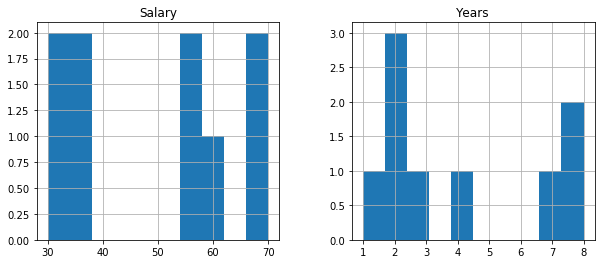

In [142]:
employee.hist(figsize=(10,4))
plt.show()

In [143]:
#Foram feitos dois histogramas mostrando a frequencia de Salarios 
#e anos na empresa trabalhando

#### What's the average salary in this company?

In [144]:
# your answer here
employee['Salary'].mean()

48.888888888888886

In [145]:
employee['Salary'].median()

55.0

#### What's the highest salary?

In [146]:
# your answer here
employee['Salary'].max()

70

#### What's the lowest salary?

In [147]:
# your answer here
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [148]:
# your answer here
employee[employee['Salary'].min() == employee['Salary']]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [149]:
# your answer here
employee[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


In [150]:
#ou
employee.loc[2]

Name            David
Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: 2, dtype: object

#### Could you give only David's salary?

In [151]:
# your answer here
employee['Salary'][employee.Name == 'David']

2    30
Name: Salary, dtype: int64

In [152]:
employee.iloc[2:3:,-1]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [153]:
# your answer here


In [154]:
employee[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [155]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [156]:
# your answer here- 2nd method
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [157]:
employee.loc[0:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [158]:
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [159]:
# your answer here

associates55 = (employee.Title == 'associate') & (employee.Salary > 55)
associates55

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
dtype: bool

In [160]:
employee[associates55]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [161]:
# your answer here
group = employee.groupby('Years')
group

In [189]:
group.mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


In [190]:
group.median()

,Salary
Years,
1,35
2,30
3,55
4,35
7,60
8,70


In [191]:
group.size()

Years
1    1
2    3
3    1
4    1
7    1
8    2
dtype: int64

####  What is the average Salary per title?

In [194]:
# your answer here
groupsalary = employee.groupby('Salary')
groupsalary

groupsalary.mean()

,Years
Salary,
30,2.0
35,2.5
55,2.5
60,7.0
70,8.0


In [195]:
groupsalary.describe()

Years                                          
       count mean       std  min   25%  50%   75%  max
Salary                                                
30       2.0  2.0  0.000000  2.0  2.00  2.0  2.00  2.0
35       2.0  2.5  2.121320  1.0  1.75  2.5  3.25  4.0
55       2.0  2.5  0.707107  2.0  2.25  2.5  2.75  3.0
60       1.0  7.0       NaN  7.0  7.00  7.0  7.00  7.0
70       2.0  8.0  0.000000  8.0  8.00  8.0  8.00  8.0

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

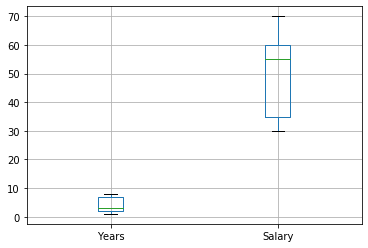

In [196]:
# draw boxplot here
employee.boxplot()

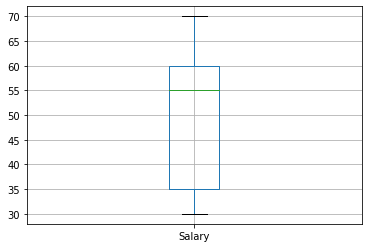

In [197]:
# print first quartile here
employee.boxplot(column = 'Salary')

In [198]:
quantiles = [.25]

In [200]:
employee.quantile(quantiles)

,Years,Salary
0.25,2.0,35.0


In [165]:
# print third quartile here

#### Is the mean salary per gender different?

In [202]:
# your answer here
group_gender = employee.groupby('Gender')
group_gender.mean()['Salary']

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [167]:
# your answer here


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [168]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [169]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [170]:
# your answer here

In [171]:
# your answer here

####  What is the average Purchase Price?

In [172]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [173]:
# your answer here

In [174]:
# your answer here

#### Select all the customers we have in Spain

In [175]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [176]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [177]:
# your answer here

#### Select orders from Spain that are above 50 items

In [178]:
# your answer here

#### Select all free orders

In [179]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [180]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [181]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [182]:
# your answer here

#### Select all orders made in the month of August

In [183]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [184]:
# your answer here

#### What's the  average amount of money spent by country

In [185]:
# your answer here

#### What's the most expensive item?

In [186]:
# your answer here

#### What was the average amount spent per year ?

In [187]:
# your answer here